# Estimation of Time-Of-Fly in SoLID Detectors

In [1]:
### Load Python Lib##### 
########
import numpy as np
from math import *
import matplotlib.pyplot as plt
from random import gauss, randint
from matplotlib import rc
from matplotlib.ticker import FixedLocator, MultipleLocator, FormatStrFormatter

#very import to enable this so the plots can be showed in the page
get_ipython().magic(u'matplotlib inline')

# Use LaTeX font.
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman'],'size':20})

## Define some detector info

In [2]:
## Particle Masses
Mass_p = 0.938272 #GeV
Mass_pi = 0.13957018 #pi+/-,GeV
Mass_k = 0.493677 #GeV
Mass_e = 0.511/1000. #GeV
c_velocity = 29.9792 #cm/ns
mass = np.array([Mass_e, Mass_pi, Mass_k, Mass_p], dtype=float)

## Timing Resolution
sigma_200ps = 200.0/1000. #200 pico-sec
sigma_150ps = 150.0/1000. #150 pico-sec
sigma_100ps = 100.0/1000. #100 pico-sec
sigma_50ps = 50.0/1000.   #50 pico-sec
sigma_10ps = 10.0/1000.   #10 pico-sec
sigma = np.array([0.0, sigma_10ps, sigma_50ps, sigma_100ps, sigma_150ps, sigma_200ps], dtype=float)

## Detector Locations
L_Target = -350.0 #cm, +/- 20cm long target cell
L_FA = 410.0 - L_Target #cm, MRPC's location
L_LA = -67.15 - L_Target #cm, LASPD's location
## proton recoil detector, 80cn from target center, 200cm long
## tilted at -45 degree, angles from 24degrees to 65 degrees
L_PRD = 80.0 #cm, 
L0 =np.array([L_FA, L_LA, L_PRD], dtype=float)

## Define variables

In [3]:
## define variables
N_Gen = 200000 # total random events
N_Type = 6; # 0 -> 0ps, 10ps, 50ps, 100ps, 150ps, 200ps 
N_Det = 3; # 0->FA, 1->LA, 2->PRD

shape = ( N_Type,N_Det, N_Gen)
## timing and velocity with 200ps resolutions
t_e= np.zeros( shape, dtype=float) #electron
t_k = np.zeros( shape, dtype=float) #kaon+/-
t_p = np.zeros( shape, dtype=float) #proton
t_pi = np.zeros( shape, dtype=float) #pion+/-

shape1 = (N_Det, N_Gen)
## Angle from 8 degree to 14.8 for FA, 16 degree to 24 for LA, and 24 to 65 for PRD
theta = np.zeros(shape1, dtype=float)

v_e = np.zeros( shape1, dtype=float) #electron
v_k = np.zeros( shape1, dtype=float) #kaon+/-
v_p = np.zeros( shape1, dtype=float) #proton
v_pi = np.zeros(shape1, dtype=float) #pion+/-
L = np.zeros( shape1, dtype=float)


## Momentum from 0 to 1GeV
mom = np.zeros(N_Gen, dtype=float)
beta_e = np.zeros( N_Gen, dtype=float) #electron
beta_k = np.zeros( N_Gen, dtype=float) #kaon+/-
beta_p = np.zeros( N_Gen, dtype=float) #proton
beta_pi = np.zeros(N_Gen, dtype=float) #pion+/-

D_beta_e = np.zeros( shape, dtype=float) #electron
D_beta_k = np.zeros( shape, dtype=float) #kaon+/-
D_beta_p = np.zeros( shape, dtype=float) #proton
D_beta_pi = np.zeros(shape, dtype=float) #pion+/-

## Randomly Generate Events 

In [4]:
##Randomy generate momentum and angles
P_Min = 0.1
P_Max = 10.2

#mom= np.random.uniform(P_Min, P_Max, N_Gen) #GeV
mom= np.arange(P_Min, P_Max, (P_Max-P_Min)/N_Gen)

#theta[0][:] = np.random.uniform(8.0, 14.8, N_Gen) # FA
#theta[1][:] = np.random.uniform(16.0, 24.0, N_Gen) # LA
#theta[2][:] = np.random.uniform(24.0-45., 65.0-45., N_Gen) # PRD

theta[0][:] = np.empty(N_Gen) # FA
theta[1][:] = np.empty(N_Gen) # LA
theta[2][:] = np.empty(N_Gen) # PRD
theta[0][:].fill(8.0)
theta[1][:].fill(16.0)
theta[2][:].fill(45.0)


for i in range(0,N_Gen):
    ##calculate ToF Beta
    for j in range(0, N_Det):
        E = sqrt(mom[i]**2 + Mass_e**2)
        beta_e[i] = sqrt(mom[i]/E)
        E = sqrt(mom[i]**2 + Mass_pi**2)
        beta_pi[i] = sqrt(mom[i]/E)
        E = sqrt(mom[i]**2 + Mass_k**2)
        beta_k[i] = sqrt(mom[i]/E)
        E = sqrt(mom[i]**2 + Mass_p**2)
        beta_p[i] = sqrt(mom[i]/E)

    ##caluclate velocity and time with resolutions
        L[j][i] = L0[j] / cos(theta[j][i] * 3.14/180)
        v_e[j][i] = beta_e[i] * c_velocity # cm/ps
        t_e[0][j][i] = L[j][i]/v_e[j][i] # 0-ps
        v_pi[j][i]= beta_pi[i] * c_velocity # cm/ps
        t_pi[0][j][i]= L[j][i]/v_pi[j][i] # 0-ps
        v_k[j][i] = beta_k[i] * c_velocity # cm/ps
        t_k[0][j][i] = L[j][i]/v_k[j][i] # 0-ps
        v_p[j][i] = beta_p[i] * c_velocity # cm/ps
        t_p[0][j][i] = L[j][i]/v_p[j][i] # 0-ps
        
        for k in range(1, N_Type):
            t_e[k][j][i] = gauss(t_e[0][j][i], sigma[k])
            t_pi[k][j][i] = gauss(t_pi[0][j][i], sigma[k])
            t_k[k][j][i] = gauss(t_k[0][j][i], sigma[k])
            t_p[k][j][i] = gauss(t_p[0][j][i], sigma[k])
            #deltaT = (t_e[k][j][i]-t_e[0][j][i])/t_e[0][j][i]
            #t_pi[k][j][i]= (1+deltaT)*t_pi[0][j][i]
            #t_k[k][j][i] = (1+deltaT)*t_k[0][j][i]
            #t_p[k][j][i] = (1+deltaT)*t_p[0][j][i]

            D_beta_e[k][j][i] = L[j][i]/t_e[k][j][i] / c_velocity
            D_beta_pi[k][j][i]= L[j][i]/t_pi[k][j][i]/ c_velocity
            D_beta_k[k][j][i] = L[j][i]/t_k[k][j][i] / c_velocity
            D_beta_p[k][j][i] = L[j][i]/t_p[k][j][i] / c_velocity
            
p = np.array(mom)

## Define ROOT Tree and Branches

In [163]:
## ROOT
from rootpy.tree import Tree, TreeModel, FloatCol, IntCol
from rootpy.io import root_open

class Event(TreeModel):
    mom = FloatCol() 
    beta_e = FloatCol()
    beta_pi = FloatCol()
    beta_k = FloatCol()
    beta_p = FloatCol()
   
    FA_theta = FloatCol()
    LA_theta = FloatCol()
    PRD_theta = FloatCol()
    FA_L = FloatCol()
    LA_L = FloatCol()
    PRD_L = FloatCol()

    FA_beta_e_10ps = FloatCol()
    FA_beta_pi_10ps = FloatCol()
    FA_beta_k_10ps = FloatCol()
    FA_beta_p_10ps = FloatCol()
    FA_beta_e_50ps = FloatCol()
    FA_beta_pi_50ps = FloatCol()
    FA_beta_k_50ps = FloatCol()
    FA_beta_p_50ps = FloatCol()
    FA_beta_e_100ps = FloatCol()
    FA_beta_pi_100ps = FloatCol()
    FA_beta_k_100ps = FloatCol()
    FA_beta_p_100ps = FloatCol()
    FA_beta_e_150ps = FloatCol()
    FA_beta_pi_150ps = FloatCol()
    FA_beta_k_150ps = FloatCol()
    FA_beta_p_150ps = FloatCol()
    FA_beta_e_200ps = FloatCol()
    FA_beta_pi_200ps = FloatCol()
    FA_beta_k_200ps = FloatCol()
    FA_beta_p_200ps = FloatCol()
    
    LA_beta_e_10ps = FloatCol()
    LA_beta_pi_10ps = FloatCol()
    LA_beta_k_10ps = FloatCol()
    LA_beta_p_10ps = FloatCol()
    LA_beta_e_50ps = FloatCol()
    LA_beta_pi_50ps = FloatCol()
    LA_beta_k_50ps = FloatCol()
    LA_beta_p_50ps = FloatCol()
    LA_beta_e_100ps = FloatCol()
    LA_beta_pi_100ps = FloatCol()
    LA_beta_k_100ps = FloatCol()
    LA_beta_p_100ps = FloatCol()
    LA_beta_e_150ps = FloatCol()
    LA_beta_pi_150ps = FloatCol()
    LA_beta_k_150ps = FloatCol()
    LA_beta_p_150ps = FloatCol()
    LA_beta_e_200ps = FloatCol()
    LA_beta_pi_200ps = FloatCol()
    LA_beta_k_200ps = FloatCol()
    LA_beta_p_200ps = FloatCol()
   
    PRD_beta_e_10ps = FloatCol()
    PRD_beta_pi_10ps = FloatCol()
    PRD_beta_k_10ps = FloatCol()
    PRD_beta_p_10ps = FloatCol()
    PRD_beta_e_50ps = FloatCol()
    PRD_beta_pi_50ps = FloatCol()
    PRD_beta_k_50ps = FloatCol()
    PRD_beta_p_50ps = FloatCol()
    PRD_beta_e_100ps = FloatCol()
    PRD_beta_pi_100ps = FloatCol()
    PRD_beta_k_100ps = FloatCol()
    PRD_beta_p_100ps = FloatCol()
    PRD_beta_e_150ps = FloatCol()
    PRD_beta_pi_150ps = FloatCol()
    PRD_beta_k_150ps = FloatCol()
    PRD_beta_p_150ps = FloatCol()
    PRD_beta_e_200ps = FloatCol()
    PRD_beta_pi_200ps = FloatCol()
    PRD_beta_k_200ps = FloatCol()
    PRD_beta_p_200ps = FloatCol()
    
    FA_t_e_0ps = FloatCol()
    FA_t_pi_0ps = FloatCol()
    FA_t_k_0ps = FloatCol()
    FA_t_p_0ps = FloatCol()
    FA_t_e_10ps = FloatCol()
    FA_t_pi_10ps = FloatCol()
    FA_t_k_10ps = FloatCol()
    FA_t_p_10ps = FloatCol()
    FA_t_e_50ps = FloatCol()
    FA_t_pi_50ps = FloatCol()
    FA_t_k_50ps = FloatCol()
    FA_t_p_50ps = FloatCol()
    FA_t_e_100ps = FloatCol()
    FA_t_pi_100ps = FloatCol()
    FA_t_k_100ps = FloatCol()
    FA_t_p_100ps = FloatCol()
    FA_t_e_150ps = FloatCol()
    FA_t_pi_150ps = FloatCol()
    FA_t_k_150ps = FloatCol()
    FA_t_p_150ps = FloatCol()
    FA_t_e_200ps = FloatCol()
    FA_t_pi_200ps = FloatCol()
    FA_t_k_200ps = FloatCol()
    FA_t_p_200ps = FloatCol()
    
    LA_t_e_0ps = FloatCol()
    LA_t_pi_0ps = FloatCol()
    LA_t_k_0ps = FloatCol()
    LA_t_p_0ps = FloatCol()
    LA_t_e_10ps = FloatCol()
    LA_t_pi_10ps = FloatCol()
    LA_t_k_10ps = FloatCol()
    LA_t_p_10ps = FloatCol()
    LA_t_e_50ps = FloatCol()
    LA_t_pi_50ps = FloatCol()
    LA_t_k_50ps = FloatCol()
    LA_t_p_50ps = FloatCol()
    LA_t_e_100ps = FloatCol()
    LA_t_pi_100ps = FloatCol()
    LA_t_k_100ps = FloatCol()
    LA_t_p_100ps = FloatCol()
    LA_t_e_150ps = FloatCol()
    LA_t_pi_150ps = FloatCol()
    LA_t_k_150ps = FloatCol()
    LA_t_p_150ps = FloatCol()
    LA_t_e_200ps = FloatCol()
    LA_t_pi_200ps = FloatCol()
    LA_t_k_200ps = FloatCol()
    LA_t_p_200ps = FloatCol()
   
    PRD_t_e_0ps = FloatCol()
    PRD_t_pi_0ps = FloatCol()
    PRD_t_k_0ps = FloatCol()
    PRD_t_p_0ps = FloatCol()
    PRD_t_e_10ps = FloatCol()
    PRD_t_pi_10ps = FloatCol()
    PRD_t_k_10ps = FloatCol()
    PRD_t_p_10ps = FloatCol()
    PRD_t_e_50ps = FloatCol()
    PRD_t_pi_50ps = FloatCol()
    PRD_t_k_50ps = FloatCol()
    PRD_t_p_50ps = FloatCol()
    PRD_t_e_100ps = FloatCol()
    PRD_t_pi_100ps = FloatCol()
    PRD_t_k_100ps = FloatCol()
    PRD_t_p_100ps = FloatCol()
    PRD_t_e_150ps = FloatCol()
    PRD_t_pi_150ps = FloatCol()
    PRD_t_k_150ps = FloatCol()
    PRD_t_p_150ps = FloatCol()
    PRD_t_e_200ps = FloatCol()
    PRD_t_pi_200ps = FloatCol()
    PRD_t_k_200ps = FloatCol()
    PRD_t_p_200ps = FloatCol()
   

file = root_open("solid_tof.root",'recreate')
T = Tree("T", model=Event)


## Fill Events into ROOT Tree

In [164]:
##Fill ROOT Tree
for i in range(0,N_Gen):

    T.mom = mom[i] 
    T.beta_e = beta_e[i]
    T.beta_pi = beta_pi[i]
    T.beta_k = beta_k[i]
    T.beta_p = beta_p[i]
   
    T.FA_theta = theta[0][i]
    T.LA_theta = theta[1][i]
    T.PRD_theta= theta[2][i]
    T.FA_L =  L[0][i]
    T.LA_L =  L[1][i]
    T.PRD_L = L[2][i]

    T.FA_beta_e_10ps = D_beta_e[1][0][i]
    T.FA_beta_pi_10ps =  D_beta_pi[1][0][i]
    T.FA_beta_k_10ps =  D_beta_k[1][0][i]
    T.FA_beta_p_10ps =  D_beta_p[1][0][i]
    T.FA_beta_e_50ps =  D_beta_e[2][0][i]
    T.FA_beta_pi_50ps =  D_beta_pi[2][0][i]
    T.FA_beta_k_50ps =  D_beta_k[2][0][i]
    T.FA_beta_p_50ps =  D_beta_p[2][0][i]
    T.FA_beta_e_100ps =  D_beta_e[3][0][i]
    T.FA_beta_pi_100ps =  D_beta_pi[3][0][i]
    T.FA_beta_k_100ps =  D_beta_k[3][0][i]
    T.FA_beta_p_100ps =  D_beta_p[3][0][i]
    T.FA_beta_e_150ps =  D_beta_e[4][0][i]
    T.FA_beta_pi_150ps =  D_beta_pi[4][0][i]
    T.FA_beta_k_150ps =  D_beta_k[4][0][i]
    T.FA_beta_p_150ps =  D_beta_p[4][0][i]
    T.FA_beta_e_200ps =  D_beta_e[5][0][i]
    T.FA_beta_pi_200ps = D_beta_e[5][0][i] 
    T.FA_beta_k_200ps =  D_beta_e[5][0][i]
    T.FA_beta_p_200ps =  D_beta_e[5][0][i]
    
    T.FA_t_e_0ps = t_e[0][0][i]
    T.FA_t_pi_0ps = t_pi[0][0][i]
    T.FA_t_k_0ps = t_k[0][0][i]
    T.FA_t_p_0ps = t_p[0][0][i]      
    T.FA_t_e_10ps = t_e[1][0][i]
    T.FA_t_pi_10ps =  t_pi[1][0][i]
    T.FA_t_k_10ps =  t_k[1][0][i]
    T.FA_t_p_10ps =  t_p[1][0][i]
    T.FA_t_e_50ps =  t_e[2][0][i]
    T.FA_t_pi_50ps =  t_pi[2][0][i]
    T.FA_t_k_50ps =  t_k[2][0][i]
    T.FA_t_p_50ps =  t_p[2][0][i]
    T.FA_t_e_100ps =  t_e[3][0][i]
    T.FA_t_pi_100ps =  t_pi[3][0][i]
    T.FA_t_k_100ps =  t_k[3][0][i]
    T.FA_t_p_100ps =  t_p[3][0][i]
    T.FA_t_e_150ps =  t_e[4][0][i]
    T.FA_t_pi_150ps =  t_pi[4][0][i]
    T.FA_t_k_150ps =  t_k[4][0][i]
    T.FA_t_p_150ps =  t_p[4][0][i]
    T.FA_t_e_200ps =  t_e[5][0][i]
    T.FA_t_pi_200ps = t_e[5][0][i] 
    T.FA_t_k_200ps =  t_e[5][0][i]
    T.FA_t_p_200ps =  t_e[5][0][i]     
    
    T.LA_beta_e_10ps = D_beta_e[1][1][i]
    T.LA_beta_pi_10ps =  D_beta_pi[1][1][i]
    T.LA_beta_k_10ps =  D_beta_k[1][1][i]
    T.LA_beta_p_10ps =  D_beta_p[1][1][i]
    T.LA_beta_e_50ps =  D_beta_e[2][1][i]
    T.LA_beta_pi_50ps =  D_beta_pi[2][1][i]
    T.LA_beta_k_50ps =  D_beta_k[2][1][i]
    T.LA_beta_p_50ps =  D_beta_p[2][1][i]
    T.LA_beta_e_100ps =  D_beta_e[3][1][i]
    T.LA_beta_pi_100ps =  D_beta_pi[3][1][i]
    T.LA_beta_k_100ps =  D_beta_k[3][1][i]
    T.LA_beta_p_100ps =  D_beta_p[3][1][i]
    T.LA_beta_e_150ps =  D_beta_e[4][1][i]
    T.LA_beta_pi_150ps =  D_beta_pi[4][1][i]
    T.LA_beta_k_150ps =  D_beta_k[4][1][i]
    T.LA_beta_p_150ps =  D_beta_p[4][1][i]
    T.LA_beta_e_200ps =  D_beta_e[5][1][i]
    T.LA_beta_pi_200ps = D_beta_e[5][1][i] 
    T.LA_beta_k_200ps =  D_beta_e[5][1][i]
    T.LA_beta_p_200ps =  D_beta_e[5][1][i]
    
    T.LA_t_e_0ps = t_e[1][1][i]
    T.LA_t_pi_0ps = t_pi[1][1][i]
    T.LA_t_k_0ps = t_k[1][1][i]
    T.LA_t_p_0ps = t_p[1][1][i]      
    T.LA_t_e_10ps = t_e[1][1][i]
    T.LA_t_pi_10ps =  t_pi[1][1][i]
    T.LA_t_k_10ps =  t_k[1][1][i]
    T.LA_t_p_10ps =  t_p[1][1][i]
    T.LA_t_e_50ps =  t_e[2][1][i]
    T.LA_t_pi_50ps =  t_pi[2][1][i]
    T.LA_t_k_50ps =  t_k[2][1][i]
    T.LA_t_p_50ps =  t_p[2][1][i]
    T.LA_t_e_100ps =  t_e[3][1][i]
    T.LA_t_pi_100ps =  t_pi[3][1][i]
    T.LA_t_k_100ps =  t_k[3][1][i]
    T.LA_t_p_100ps =  t_p[3][1][i]
    T.LA_t_e_150ps =  t_e[4][1][i]
    T.LA_t_pi_150ps =  t_pi[4][1][i]
    T.LA_t_k_150ps =  t_k[4][1][i]
    T.LA_t_p_150ps =  t_p[4][1][i]
    T.LA_t_e_200ps =  t_e[5][1][i]
    T.LA_t_pi_200ps = t_e[5][1][i] 
    T.LA_t_k_200ps =  t_e[5][1][i]
    T.LA_t_p_200ps =  t_e[5][1][i]     
    
    T.PRD_beta_e_10ps = D_beta_e[1][2][i]
    T.PRD_beta_pi_10ps =  D_beta_pi[1][2][i]
    T.PRD_beta_k_10ps =  D_beta_k[1][2][i]
    T.PRD_beta_p_10ps =  D_beta_p[1][2][i]
    T.PRD_beta_e_50ps =  D_beta_e[2][2][i]
    T.PRD_beta_pi_50ps =  D_beta_pi[2][2][i]
    T.PRD_beta_k_50ps =  D_beta_k[2][2][i]
    T.PRD_beta_p_50ps =  D_beta_p[2][2][i]
    T.PRD_beta_e_100ps =  D_beta_e[3][2][i]
    T.PRD_beta_pi_100ps =  D_beta_pi[3][2][i]
    T.PRD_beta_k_100ps =  D_beta_k[3][2][i]
    T.PRD_beta_p_100ps =  D_beta_p[3][2][i]
    T.PRD_beta_e_150ps =  D_beta_e[4][2][i]
    T.PRD_beta_pi_150ps =  D_beta_pi[4][2][i]
    T.PRD_beta_k_150ps =  D_beta_k[4][2][i]
    T.PRD_beta_p_150ps =  D_beta_p[4][2][i]
    T.PRD_beta_e_200ps =  D_beta_e[5][2][i]
    T.PRD_beta_pi_200ps = D_beta_e[5][2][i] 
    T.PRD_beta_k_200ps =  D_beta_e[5][2][i]
    T.PRD_beta_p_200ps =  D_beta_e[5][2][i]
    
    T.PRD_t_e_0ps = t_e[2][2][i]
    T.PRD_t_pi_0ps = t_pi[2][2][i]
    T.PRD_t_k_0ps = t_k[2][2][i]
    T.PRD_t_p_0ps = t_p[2][2][i]      
    T.PRD_t_e_10ps = t_e[1][2][i]
    T.PRD_t_pi_10ps =  t_pi[1][2][i]
    T.PRD_t_k_10ps =  t_k[1][2][i]
    T.PRD_t_p_10ps =  t_p[1][2][i]
    T.PRD_t_e_50ps =  t_e[2][2][i]
    T.PRD_t_pi_50ps =  t_pi[2][2][i]
    T.PRD_t_k_50ps =  t_k[2][2][i]
    T.PRD_t_p_50ps =  t_p[2][2][i]
    T.PRD_t_e_100ps =  t_e[3][2][i]
    T.PRD_t_pi_100ps =  t_pi[3][2][i]
    T.PRD_t_k_100ps =  t_k[3][2][i]
    T.PRD_t_p_100ps =  t_p[3][2][i]
    T.PRD_t_e_150ps =  t_e[4][2][i]
    T.PRD_t_pi_150ps =  t_pi[4][2][i]
    T.PRD_t_k_150ps =  t_k[4][2][i]
    T.PRD_t_p_150ps =  t_p[4][2][i]
    T.PRD_t_e_200ps =  t_e[5][2][i]
    T.PRD_t_pi_200ps = t_e[5][2][i] 
    T.PRD_t_k_200ps =  t_e[5][2][i]
    T.PRD_t_p_200ps =  t_e[5][2][i]     
 
    T.fill()

T.Write()
file.Close()

False

## Plot Time-Different vs. P w/o time resolution

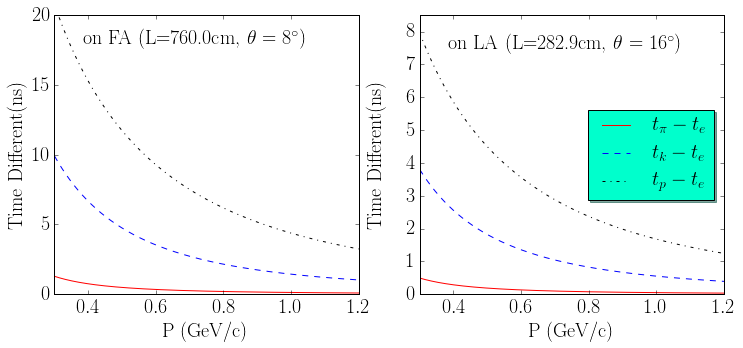

In [45]:
##Plot Beta vs. p
# Create figure, subplots, title.
f, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12,5))
#f.subplots_adjust(bottom=0.08, top=0.96, hspace=0.)

P_Min1=0.3
P_Max1=1.1
#Beta vs t for FA
ndet = 0
nres = 0## 0ps
delta_pi = np.array(t_pi[nres][ndet][:]-t_e[nres][ndet][:])
axes[0].plot(p, delta_pi,'k-', color='red',  label='$t_{\pi}-t_{e}$')

delta_k = np.array(t_k[nres][ndet][:]-t_e[nres][ndet][:])
axes[0].plot(p, delta_k,'k--', color='blue',  label='$t_{k}-t_{e}$')

delta_p = np.array(t_p[nres][ndet][:]-t_e[nres][ndet][:])
axes[0].plot(p, delta_p,'k-.', color='black',  label='$t_{p}-t_{e}$')
axes[0].set_ylim(0.0, 20.0)
axes[0].text(P_Max1*0.35, 18, r'on FA (L=%5.1fcm, $\theta=%d^\circ$)'%(L0[ndet], theta[ndet][0]))

legend = plt.legend(loc='upper right', shadow=True, fontsize='medium')

#Beta vs t for LA
ndet = 1
nres = 0## 0ps
delta_pi = np.array(t_pi[nres][ndet][:]-t_e[nres][ndet][:])
axes[1].plot(p, delta_pi,'k-', color='red',  label='$t_{\pi}-t_{e}$')

delta_k = np.array(t_k[nres][ndet][:]-t_e[nres][ndet][:])
axes[1].plot(p, delta_k,'k--', color='blue',  label='$t_{k}-t_{e}$')

delta_p = np.array(t_p[nres][ndet][:]-t_e[nres][ndet][:])
axes[1].plot(p, delta_p,'k-.', color='black',  label='$t_{p}-t_{e}$')
axes[1].set_ylim(0.0, 8.5)
axes[1].text(P_Max1*0.35, 7.5, r'on LA (L=%5.1fcm, $\theta=%d^\circ$)'%(L0[ndet], theta[ndet][0]))

#Beta vs t for PRD
#ndet = 2
#nres = 0## 0ps
#delta_pi = np.array(t_pi[nres][ndet][:]-t_e[nres][ndet][:])
#pl2_pi = axes[2].plot(p, delta_pi,'k-', color='red',  label='$t_{\pi}-t_{e}$')

#delta_k = np.array(t_k[nres][ndet][:]-t_e[nres][ndet][:])
#pl2_k = axes[2].plot(p, delta_k,'k--', color='blue',  label='$t_{k}-t_{e}$')

#delta_p = np.array(t_p[nres][ndet][:]-t_e[nres][ndet][:])
#pl2_p = axes[2].plot(p, delta_p,'k-.', color='black',  label='$t_{p}-t_{e}$')

#axes[2].set_ylim(0.0, 3.0)
#axes[2].text(P_Max1*0.35, 2.5, r'on PRD (L=%5.1fcm, $\theta=%d^\circ$)'%(L0[ndet], theta[ndet][0]))

axes[0].set_ylabel('Time Different(ns)',fontsize=20)
axes[1].set_ylabel('Time Different(ns)',fontsize=20)
axes[1].yaxis.labelpad = 20

axes[1].set_xlim(P_Min1, P_Max1+0.1)
axes[0].set_xlabel('P (GeV/c)')
axes[1].set_xlabel('P (GeV/c)')

legend1 = plt.legend(loc='right', shadow=True, fontsize='medium')
# Put a nicer background color on the legend.
legend1.get_frame().set_facecolor('#00FFCC')
#plt.show()

plt.savefig('time_diff.png')
plt.savefig('time_diff.pdf')


## Plot $\beta_{TOF}$ vs. t at Forward-Angle w/ timing resolution

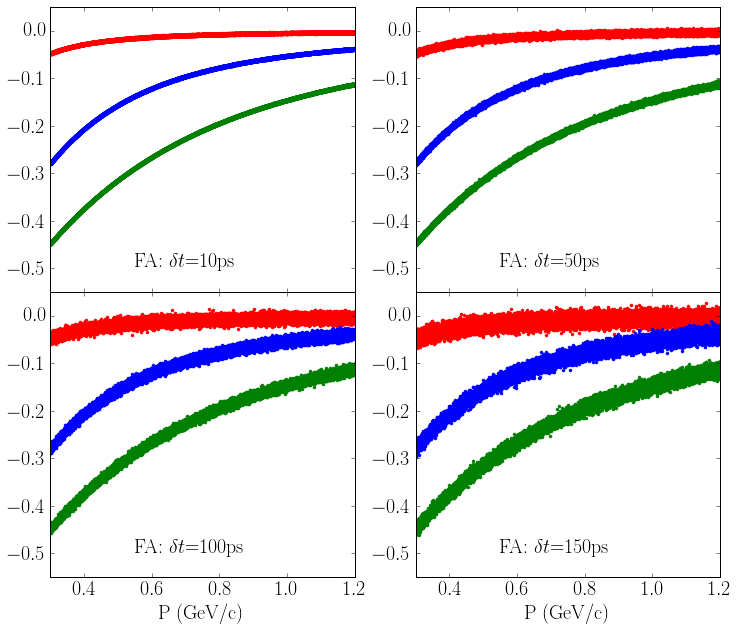

In [166]:
##Plot Beta vs. p
# Create figure, subplots, title.
f, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12,9))
f.subplots_adjust(bottom=0.08, top=0.96, hspace=0.0)

#P_Max=4.1

#Beta vs t for FA
ndet = 0

nres = 1## 10ps
beta_pi = np.array(D_beta_pi[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,0].plot(p, beta_pi,'.', color='red',  label='pi_fa_0')

beta_k = np.array(D_beta_k[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,0].plot(p, beta_k,'.', color='blue',  label='k_fa_0')

beta_p = np.array(D_beta_p[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,0].plot(p, beta_p,'.', color='green',  label='k_fa_0')
axes[0,0].set_ylim(-0.55, 0.05)
axes[0,0].text(P_Max1/2.0, -0.5, r'FA: $\delta t$=10ps')

nres=2## 50ps
beta_pi = np.array(D_beta_pi[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,1].plot(p, beta_pi,'.', color='red',  label='pi_fa_0')

beta_k = np.array(D_beta_k[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,1].plot(p, beta_k,'.', color='blue',  label='k_fa_0')

beta_p = np.array(D_beta_p[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,1].plot(p, beta_p,'.', color='green',  label='k_fa_0')
axes[0,1].set_ylim(-0.55, 0.05)
axes[0,1].text(P_Max1/2.0, -0.5, r'FA: $\delta t$=50ps')

nres=3## 100ps
beta_pi = np.array(D_beta_pi[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,0].plot(p, beta_pi,'.', color='red',  label='pi_fa_0')

beta_k = np.array(D_beta_k[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,0].plot(p, beta_k,'.', color='blue',  label='k_fa_0')

beta_p = np.array(D_beta_p[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,0].plot(p, beta_p,'.', color='green',  label='k_fa_0')
axes[1,0].set_ylim(-0.55, 0.05)
axes[1,0].text(P_Max1/2.0, -0.5, r'FA: $\delta t$=100ps')

nres=4## 150ps
beta_pi = np.array(D_beta_pi[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,1].plot(p, beta_pi,'.', color='red',  label='pi_fa_0')

beta_k = np.array(D_beta_k[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,1].plot(p, beta_k,'.', color='blue',  label='k_fa_0')

beta_p = np.array(D_beta_p[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,1].plot(p, beta_p,'.', color='green',  label='k_fa_0')
axes[1,1].set_ylim(-0.55, 0.05)
axes[1,1].text(P_Max1/2.0, -0.5, r'FA: $\delta t$=150ps')


#axes[1,0].set_ylabel('$\Delta \Beta$') # label, y-axis

axes[1,0].set_xlim(P_Min1, P_Max1+0.1)
axes[1,0].set_xlabel('P (GeV/c)')
axes[1,1].set_xlim(P_Min1, P_Max1+0.1)
axes[1,1].set_xlabel('P (GeV/c)')
#axes.yaxis.set_major_locator(MultipleLocator((ymax_GErat-ymin_GErat)/5.0))
#axes.yaxis.set_minor_locator(MultipleLocator((ymax_GErat-ymin_GErat)/10.0))

plt.savefig('tof_fa.png')

## Plot $\beta_{TOF}$ vs. t at Large-Angle w/ timing resolution

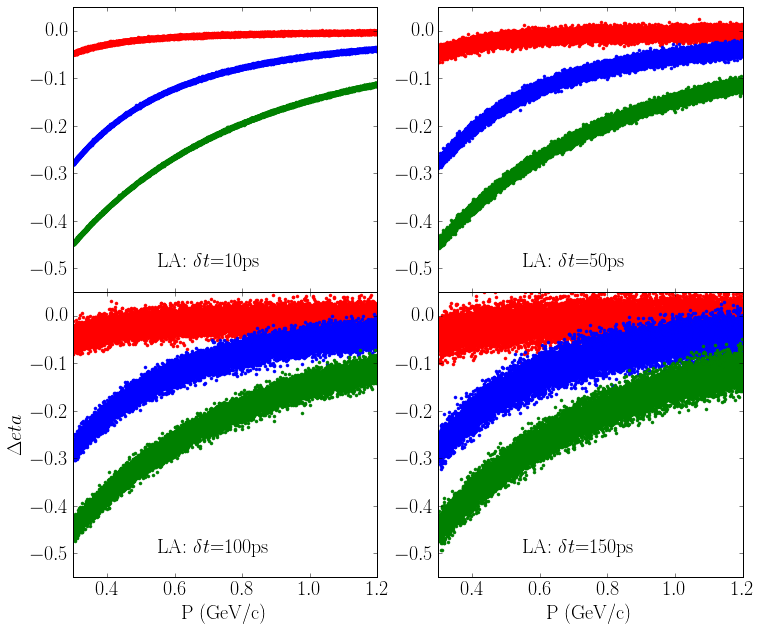

In [167]:
##Plot Beta vs. p
# Create figure, subplots, title.
f, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12,9))
f.subplots_adjust(bottom=0.08, top=0.96, hspace=0.0)

#Beta vs t for LA
ndet = 1

## 10ps
nres = 1
beta_pi = np.array(D_beta_pi[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,0].plot(p, beta_pi,'.', color='red',  label='pi_fa_0')

beta_k = np.array(D_beta_k[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,0].plot(p, beta_k,'.', color='blue',  label='k_fa_0')

beta_p = np.array(D_beta_p[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,0].plot(p, beta_p,'.', color='green',  label='k_fa_0')
axes[0,0].set_ylim(-0.55, 0.05)
axes[0,0].text(P_Max1/2.0, -0.5, r'LA: $\delta t$=10ps')

## 50ps
nres=2
beta_pi = np.array(D_beta_pi[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,1].plot(p, beta_pi,'.', color='red',  label='pi_fa_0')

beta_k = np.array(D_beta_k[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,1].plot(p, beta_k,'.', color='blue',  label='k_fa_0')

beta_p = np.array(D_beta_p[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,1].plot(p, beta_p,'.', color='green',  label='k_fa_0')
axes[0,1].set_ylim(-0.55, 0.05)
axes[0,1].text(P_Max1/2.0, -0.5, r'LA: $\delta t$=50ps')

## 100ps
nres=3
beta_pi = np.array(D_beta_pi[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,0].plot(p, beta_pi,'.', color='red',  label='pi_fa_0')

beta_k = np.array(D_beta_k[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,0].plot(p, beta_k,'.', color='blue',  label='k_fa_0')

beta_p = np.array(D_beta_p[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,0].plot(p, beta_p,'.', color='green',  label='k_fa_0')
axes[1,0].set_ylim(-0.55, 0.05)
axes[1,0].text(P_Max1/2.0, -0.5, r'LA: $\delta t$=100ps')

## 150ps
nres=4
beta_pi = np.array(D_beta_pi[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,1].plot(p, beta_pi,'.', color='red',  label='pi_fa_0')

beta_k = np.array(D_beta_k[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,1].plot(p, beta_k,'.', color='blue',  label='k_fa_0')

beta_p = np.array(D_beta_p[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,1].plot(p, beta_p,'.', color='green',  label='k_fa_0')
axes[1,1].set_ylim(-0.55, 0.05)
axes[1,1].text(P_Max1/2.0, -0.5, r'LA: $\delta t$=150ps')


axes[1,0].set_ylabel('$\Delta \beta$') # label, y-axis

axes[1,0].set_xlim(P_Min1, P_Max1+0.1)
axes[1,0].set_xlabel('P (GeV/c)')
axes[1,1].set_xlim(P_Min1, P_Max1+0.1)
axes[1,1].set_xlabel('P (GeV/c)')
#axes.yaxis.set_major_locator(MultipleLocator((ymax_GErat-ymin_GErat)/5.0))
#axes.yaxis.set_minor_locator(MultipleLocator((ymax_GErat-ymin_GErat)/10.0))

plt.savefig('tof_LA.png')

## Plot $\beta_{TOF}$ vs. t at Proton Recoil Detector w/ timing resolution

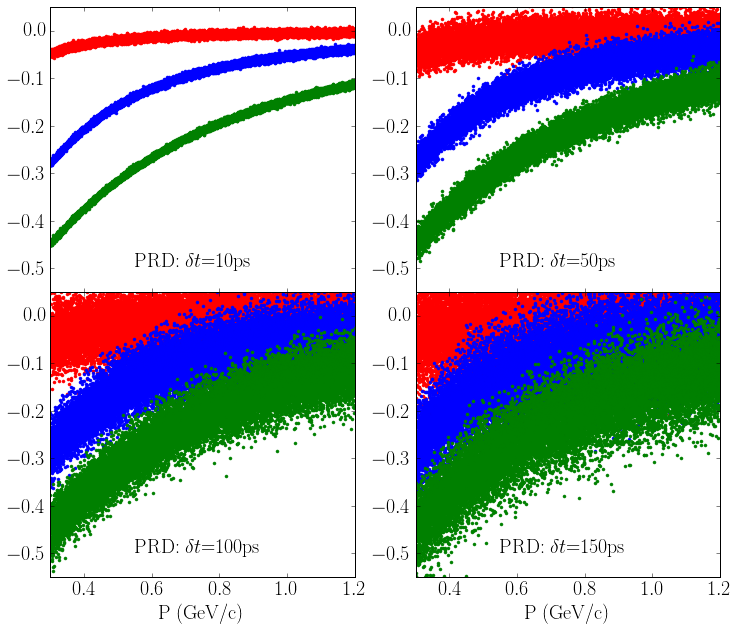

In [168]:
##Plot Beta vs. p
# Create figure, subplots, title.
f, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12,9))
f.subplots_adjust(bottom=0.08, top=0.96, hspace=0.0)

#Beta vs t for T.PRD
ndet = 2

## 10ps
nres = 1
beta_pi = np.array(D_beta_pi[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,0].plot(p, beta_pi,'.', color='red',  label='pi_fa_0')

beta_k = np.array(D_beta_k[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,0].plot(p, beta_k,'.', color='blue',  label='k_fa_0')

beta_p = np.array(D_beta_p[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,0].plot(p, beta_p,'.', color='green',  label='k_fa_0')
axes[0,0].set_ylim(-0.55, 0.05)
axes[0,0].text(P_Max1/2.0, -0.5, r'PRD: $\delta t$=10ps')

## 50ps
nres=2
beta_pi = np.array(D_beta_pi[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,1].plot(p, beta_pi,'.', color='red',  label='pi_fa_0')

beta_k = np.array(D_beta_k[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,1].plot(p, beta_k,'.', color='blue',  label='k_fa_0')

beta_p = np.array(D_beta_p[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[0,1].plot(p, beta_p,'.', color='green',  label='k_fa_0')
axes[0,1].set_ylim(-0.55, 0.05)
axes[0,1].text(P_Max1/2.0, -0.5, r'PRD: $\delta t$=50ps')

## 100ps
nres=3
beta_pi = np.array(D_beta_pi[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,0].plot(p, beta_pi,'.', color='red',  label='pi_fa_0')

beta_k = np.array(D_beta_k[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,0].plot(p, beta_k,'.', color='blue',  label='k_fa_0')

beta_p = np.array(D_beta_p[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,0].plot(p, beta_p,'.', color='green',  label='k_fa_0')
axes[1,0].set_ylim(-0.55, 0.05)
axes[1,0].text(P_Max1/2.0, -0.5, r'PRD: $\delta t$=100ps')

## 150ps
nres=4
beta_pi = np.array(D_beta_pi[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,1].plot(p, beta_pi,'.', color='red',  label='pi_fa_0')

beta_k = np.array(D_beta_k[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,1].plot(p, beta_k,'.', color='blue',  label='k_fa_0')

beta_p = np.array(D_beta_p[nres][ndet][:]-D_beta_e[nres][ndet][:])
axes[1,1].plot(p, beta_p,'.', color='green',  label='k_fa_0')
axes[1,1].set_ylim(-0.55, 0.05)
axes[1,1].text(P_Max1/2.0, -0.5, r'PRD: $\delta t$=150ps')

axes[1,0].set_xlim(P_Min1, P_Max1+0.1)
axes[1,0].set_xlabel('P (GeV/c)')
axes[1,1].set_xlim(P_Min1, P_Max1+0.1)
axes[1,1].set_xlabel('P (GeV/c)')
#axes.yaxis.set_major_locator(MultipleLocator((ymax_GErat-ymin_GErat)/5.0))
#axes.yaxis.set_minor_locator(MultipleLocator((ymax_GErat-ymin_GErat)/10.0))

plt.savefig('tof_PRD.png')

## 1D $\beta_{TOF}$ for different particles on FA

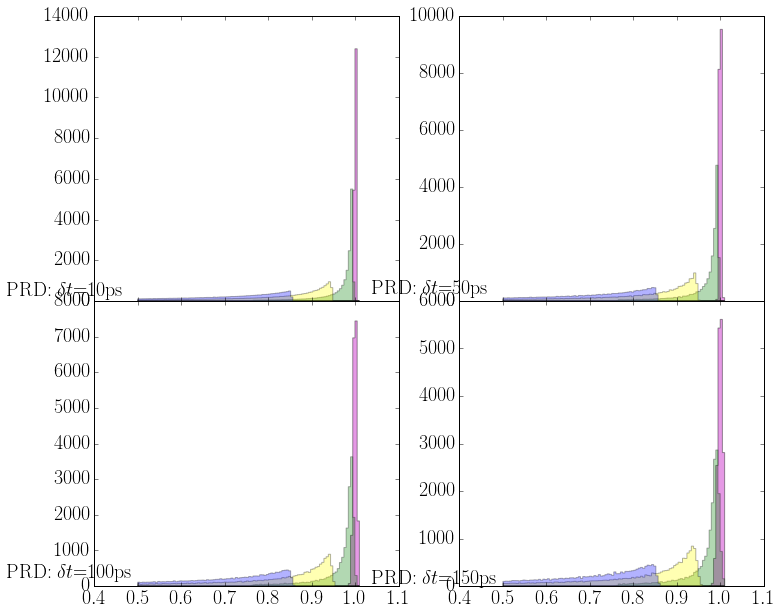

In [169]:
##Plot Beta 1D
# Create figure, subplots, title.
f1, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12,9))
f1.subplots_adjust(bottom=0.08, top=0.96, hspace=0.0)

#Beta  for T.FA
ndet = 0

## 10ps
nres = 1
beta_e = np.array(D_beta_e[nres][ndet][p<1.0])
axes[0,0].hist(beta_e,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='m', alpha=0.4)

beta_pi = np.array(D_beta_pi[nres][ndet][p<1.0])
axes[0,0].hist(beta_pi,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='g', alpha=0.3)

beta_k = np.array(D_beta_k[nres][ndet][p<1.0])
axes[0,0].hist(beta_k,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='yellow', alpha=0.3)

beta_p = np.array(D_beta_p[nres][ndet][p<1.0])
axes[0,0].hist(beta_p,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='blue', alpha=0.3)
axes[0,0].text(0.2, 200, r'PRD: $\delta t$=10ps')

## 50ps
nres = 2
beta_e = np.array(D_beta_e[nres][ndet][p<1.0])
axes[0,1].hist(beta_e,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='m', alpha=0.4)

beta_pi = np.array(D_beta_pi[nres][ndet][p<1.0])
axes[0,1].hist(beta_pi,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='g', alpha=0.3)

beta_k = np.array(D_beta_k[nres][ndet][p<1.0])
axes[0,1].hist(beta_k,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='yellow', alpha=0.3)

beta_p = np.array(D_beta_p[nres][ndet][p<1.0])
axes[0,1].hist(beta_p,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='blue', alpha=0.3)
axes[0,1].text(0.2, 200, r'PRD: $\delta t$=50ps')

## 100ps
nres = 3
beta_e = np.array(D_beta_e[nres][ndet][p<1.0])
axes[1,0].hist(beta_e,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='m', alpha=0.4)

beta_pi = np.array(D_beta_pi[nres][ndet][p<1.0])
axes[1,0].hist(beta_pi,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='g', alpha=0.3)

beta_k = np.array(D_beta_k[nres][ndet][p<1.0])
axes[1,0].hist(beta_k,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='yellow', alpha=0.3)

beta_p = np.array(D_beta_p[nres][ndet][p<1.0])
axes[1,0].hist(beta_p,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='blue', alpha=0.3)
axes[1,0].text(0.2, 200, r'PRD: $\delta t$=100ps')

## 150ps
nres = 4
beta_e = np.array(D_beta_e[nres][ndet][p<1.0])
axes[1,1].hist(beta_e,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='m', alpha=0.4)

beta_pi = np.array(D_beta_pi[nres][ndet][p<1.0])
axes[1,1].hist(beta_pi,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='g', alpha=0.3)

beta_k = np.array(D_beta_k[nres][ndet][p<1.0])
axes[1,1].hist(beta_k,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='yellow', alpha=0.3)

beta_p = np.array(D_beta_p[nres][ndet][p<1.0])
axes[1,1].hist(beta_p,range=(0.5,1.01), bins=100, histtype='stepfilled', facecolor='blue', alpha=0.3)
axes[1,1].text(0.2, 20, r'PRD: $\delta t$=150ps')


plt.savefig('beta_FA.png')

## 1D $\beta_{TOF}$ for different particles on LA

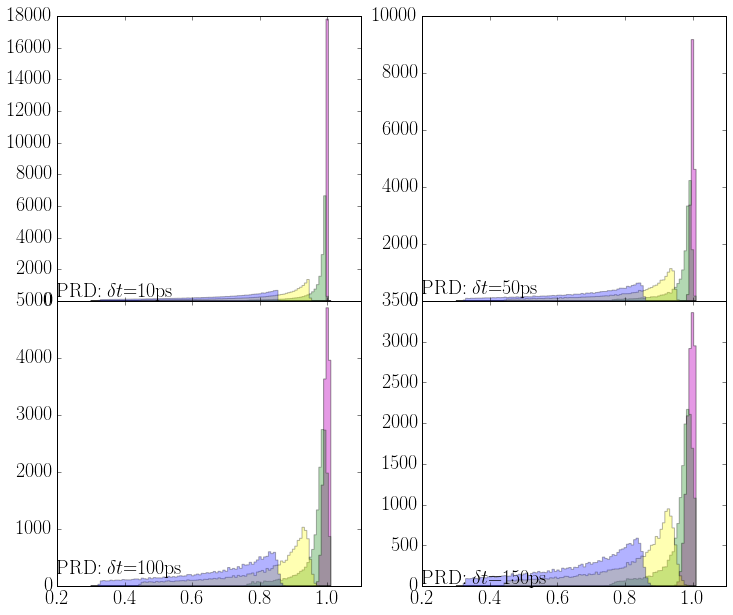

In [170]:
##Plot Beta 1D
# Create figure, subplots, title.
f1, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12,9))
f1.subplots_adjust(bottom=0.08, top=0.96, hspace=0.0)

#Beta vs t for T.LA
ndet = 1

## 10ps
nres = 1
beta_e = np.array(D_beta_e[nres][ndet][p<1.0])
axes[0,0].hist(beta_e,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='m', alpha=0.4)

beta_pi = np.array(D_beta_pi[nres][ndet][p<1.0])
axes[0,0].hist(beta_pi,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='g', alpha=0.3)

beta_k = np.array(D_beta_k[nres][ndet][p<1.0])
axes[0,0].hist(beta_k,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='yellow', alpha=0.3)

beta_p = np.array(D_beta_p[nres][ndet][p<1.0])
axes[0,0].hist(beta_p,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='blue', alpha=0.3)
axes[0,0].text(0.2, 200, r'PRD: $\delta t$=10ps')

## 50ps
nres = 2
beta_e = np.array(D_beta_e[nres][ndet][p<1.0])
axes[0,1].hist(beta_e,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='m', alpha=0.4)

beta_pi = np.array(D_beta_pi[nres][ndet][p<1.0])
axes[0,1].hist(beta_pi,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='g', alpha=0.3)

beta_k = np.array(D_beta_k[nres][ndet][p<1.0])
axes[0,1].hist(beta_k,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='yellow', alpha=0.3)

beta_p = np.array(D_beta_p[nres][ndet][p<1.0])
axes[0,1].hist(beta_p,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='blue', alpha=0.3)
axes[0,1].text(0.2, 200, r'PRD: $\delta t$=50ps')

## 100ps
nres = 3
beta_e = np.array(D_beta_e[nres][ndet][p<1.0])
axes[1,0].hist(beta_e,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='m', alpha=0.4)

beta_pi = np.array(D_beta_pi[nres][ndet][p<1.0])
axes[1,0].hist(beta_pi,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='g', alpha=0.3)

beta_k = np.array(D_beta_k[nres][ndet][p<1.0])
axes[1,0].hist(beta_k,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='yellow', alpha=0.3)

beta_p = np.array(D_beta_p[nres][ndet][p<1.0])
axes[1,0].hist(beta_p,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='blue', alpha=0.3)
axes[1,0].text(0.2, 200, r'PRD: $\delta t$=100ps')

## 150ps
nres = 4
beta_e = np.array(D_beta_e[nres][ndet][p<1.0])
axes[1,1].hist(beta_e,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='m', alpha=0.4)

beta_pi = np.array(D_beta_pi[nres][ndet][p<1.0])
axes[1,1].hist(beta_pi,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='g', alpha=0.3)

beta_k = np.array(D_beta_k[nres][ndet][p<1.0])
axes[1,1].hist(beta_k,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='yellow', alpha=0.3)

beta_p = np.array(D_beta_p[nres][ndet][p<1.0])
axes[1,1].hist(beta_p,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='blue', alpha=0.3)
axes[1,1].text(0.2, 20, r'PRD: $\delta t$=150ps')


plt.savefig('beta_LA.png')

## 1D $\beta_{TOF}$ for different particles on PRD

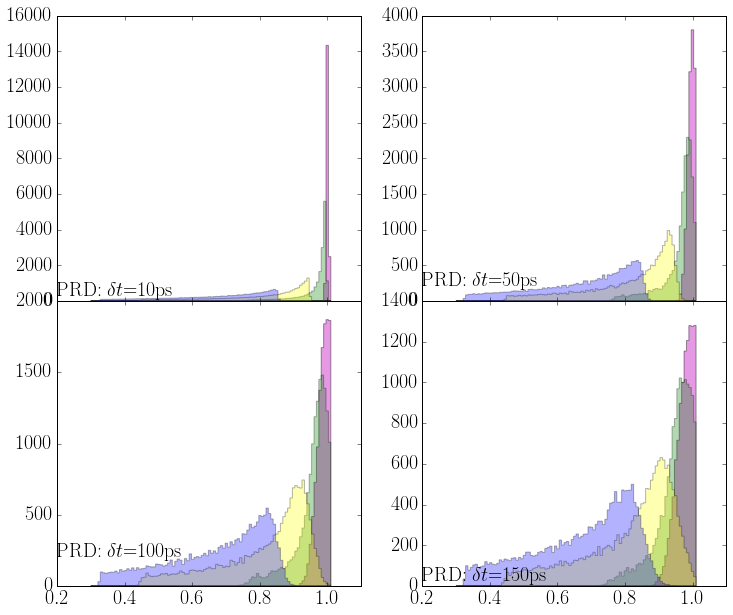

In [171]:
##Plot Beta 1D
# Create figure, subplots, title.
f1, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12,9))
f1.subplots_adjust(bottom=0.08, top=0.96, hspace=0.0)

#Beta vs t for T.PRD
ndet = 2

## 10ps
nres = 1
beta_e = np.array(D_beta_e[nres][ndet][p<1.0])
axes[0,0].hist(beta_e,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='m', alpha=0.4)

beta_pi = np.array(D_beta_pi[nres][ndet][p<1.0])
axes[0,0].hist(beta_pi,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='g', alpha=0.3)

beta_k = np.array(D_beta_k[nres][ndet][p<1.0])
axes[0,0].hist(beta_k,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='yellow', alpha=0.3)

beta_p = np.array(D_beta_p[nres][ndet][p<1.0])
axes[0,0].hist(beta_p,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='blue', alpha=0.3)
axes[0,0].text(0.2, 200, r'PRD: $\delta t$=10ps')

## 50ps
nres = 2
beta_e = np.array(D_beta_e[nres][ndet][p<1.0])
axes[0,1].hist(beta_e,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='m', alpha=0.4)

beta_pi = np.array(D_beta_pi[nres][ndet][p<1.0])
axes[0,1].hist(beta_pi,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='g', alpha=0.3)

beta_k = np.array(D_beta_k[nres][ndet][p<1.0])
axes[0,1].hist(beta_k,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='yellow', alpha=0.3)

beta_p = np.array(D_beta_p[nres][ndet][p<1.0])
axes[0,1].hist(beta_p,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='blue', alpha=0.3)
axes[0,1].text(0.2, 200, r'PRD: $\delta t$=50ps')

## 100ps
nres = 3
beta_e = np.array(D_beta_e[nres][ndet][p<1.0])
axes[1,0].hist(beta_e,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='m', alpha=0.4)

beta_pi = np.array(D_beta_pi[nres][ndet][p<1.0])
axes[1,0].hist(beta_pi,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='g', alpha=0.3)

beta_k = np.array(D_beta_k[nres][ndet][p<1.0])
axes[1,0].hist(beta_k,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='yellow', alpha=0.3)

beta_p = np.array(D_beta_p[nres][ndet][p<1.0])
axes[1,0].hist(beta_p,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='blue', alpha=0.3)
axes[1,0].text(0.2, 200, r'PRD: $\delta t$=100ps')

## 150ps
nres = 4
beta_e = np.array(D_beta_e[nres][ndet][p<1.0])
axes[1,1].hist(beta_e,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='m', alpha=0.4)

beta_pi = np.array(D_beta_pi[nres][ndet][p<1.0])
axes[1,1].hist(beta_pi,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='g', alpha=0.3)

beta_k = np.array(D_beta_k[nres][ndet][p<1.0])
axes[1,1].hist(beta_k,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='yellow', alpha=0.3)

beta_p = np.array(D_beta_p[nres][ndet][p<1.0])
axes[1,1].hist(beta_p,range=(0.3,1.01), bins=100, histtype='stepfilled', facecolor='blue', alpha=0.3)
axes[1,1].text(0.2, 20, r'PRD: $\delta t$=150ps')


plt.savefig('beta_PRD.png')